# UEFA Euro 2024 Predictor

## Predicting the Euro 2024 Bracket

Anzar Chowdhury, Ben Ghouzi, Triya Basu & Emma Rabbath

# **Data Wrangling**

## Overview of Datasets
We are using the International Football Results dataset from 1872 to 2024 from kaggle:
https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017

We are specifically using the data from the results.csv file for past match performance results between teams. results.csv includes the following columns:

- date - date of the match
- home_team - the name of the home team
- away_team - the name of the away team
- home_score - full-time home team score including extra time, not including penalty-shootouts
- away_score - full-time away team score including extra time, not including penalty-shootouts
- tournament - the name of the tournament
- city - the name of the city/town/administrative unit where the match was played
- country - the name of the country where the match was played
- neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue


In addition, we are also using a FIFA Rankings dataset from 1872 to 2024 from kaggle:
https://www.kaggle.com/datasets/cashncarry/fifaworldranking

This dataset contains information with regards to the ranking of each team. Columns from the dataset (fifa_ranking-2023-07-20.csv) include:
- country_full — country full name
- country_abrv — country abbreviation
- rank — current country rank
- total_points — current total points
- previous_points — total points in last rating
- rank_change — how rank has changed since the last publication
- confederation — FIFA confederations
- rank_date — date of rating calculation
- column ID has been deleted from source

We uploaded the two datasets to GitHub for ease of use, as it would not result in any confusion that may be caused by hard coding a file path.

fifa_results_url = https://raw.githubusercontent.com/anc002/ds3000project/main/results.csv

fifa_rankings_url = https://raw.githubusercontent.com/anc002/ds3000project/main/fifa_ranking-2023-07-20.csv


## **Loading & Prepping FIFA Dataset: International football results from 1872 to 2024**

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

/var/folders/dd/5hhztzc96t1717zrjlkk8nsh0000gn/T/ipykernel_90068/1285016483.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


**Loading Data**

In [2]:
# Loading Data
fifa_results_url = 'https://raw.githubusercontent.com/anc002/ds3000project/main/results.csv'
fifa_results_df = pd.read_csv(fifa_results_url)

# Display first few rows
fifa_results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [3]:
# Get an understanding of the Data
fifa_results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46289 entries, 0 to 46288
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        46289 non-null  object
 1   home_team   46289 non-null  object
 2   away_team   46289 non-null  object
 3   home_score  46289 non-null  int64 
 4   away_score  46289 non-null  int64 
 5   tournament  46289 non-null  object
 6   city        46289 non-null  object
 7   country     46289 non-null  object
 8   neutral     46289 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.9+ MB


**Cleaning & Filtering Data**

In [4]:
# Convert 'date' column to datetime
fifa_results_df['date'] = pd.to_datetime(fifa_results_df['date'])

# Filter data for matches from 2014 onwards
fifa_results_df = fifa_results_df[fifa_results_df['date'] >= '2014-01-01']

Football teams can undergo significant changes over time, including changes in player rosters, coaching staff, and strategies. Data from the last 10 years is likely to be more reflective of the current strengths and weaknesses of the teams.

Hence the data includes results for the FIFA 2014, 2018 & 2022 World Cup and Euro 2016 & 2020 along with other friendly matches, qualifiers, etc.

In [5]:
# Filter data for UEFA 2024 teams
uefa_2024_teams = ['Albania', 'Austria', 'Belgium', 'Croatia', 'Czechia', 'Denmark', 'England', 'France', 'Germany', 'Hungary', 'Italy', 'Netherlands',
                   'Portugal', 'Romania', 'Scotland', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Switzerland', 'Turkey']

# List of teams in play-offs
uefa_2024_playoff_teams = ['Poland', 'Estonia', 'Wales', 'Finland', 'Israel', 'Iceland', 'Bosnia and Herzegovina', 'Ukraine', 'Georgia', 'Luxembourg',
                           'Greece', 'Kazakhstan']

# Adding play-off teams to list
uefa_2024_teams.extend(uefa_2024_playoff_teams)

# Replace 'Czech Republic' with 'Czechia'
fifa_results_df.replace({'home_team': 'Czech Republic', 'away_team': 'Czech Republic'}, 'Czechia', inplace=True)


# Filter data to only include countries playing in EURO 2024
fifa_results_df = fifa_results_df[(fifa_results_df['home_team'].isin(uefa_2024_teams)) &
                                  (fifa_results_df['away_team'].isin(uefa_2024_teams))]

# Making sure results are consistent
print(f"Number of Home Countries: {len(fifa_results_df['home_team'].unique())}, Number of Away Countries: {len(fifa_results_df['away_team'].unique())}")


Number of Home Countries: 33, Number of Away Countries: 33


We need to filter Home and Away teams for countries that have qualified to play in the UEFA Euro 2024, since there are three teams out of twelve yet to be chosen as of 28th February through play-offs, those teams will be included for now as well.

https://www.uefa.com/euro2024/draws/

https://www.uefa.com/european-qualifiers/news/0279-1635c1adf4c0-831ffc150fff-1000--euro-2024-play-offs-how-they-work-state-of-play/

---

It is important to note that Czechia has recently changed its name from the

Czech Republic, in order to make sure that the data is consistent, all instances of the Czech Republic will be changed to Czechia

https://www.timeout.com/news/the-czech-republic-is-changing-its-name-heres-why-022123

In [6]:
# Check for null values
null_counts = fifa_results_df.isnull().sum()

# If there are no null values, print 'No null values'
if null_counts.sum() == 0:
    print("No null values in the Data Set")
else:
    # If there are null values, print number of null values in each column
    print("Number of null values in each column:")
    print(null_counts)


No null values in the Data Set


In [7]:
# Changing data types
fifa_results_df = fifa_results_df.copy() # Making a copy of DataFrame
fifa_results_df['home_team'] = fifa_results_df['home_team'].astype('category')
fifa_results_df['away_team'] = fifa_results_df['away_team'].astype('category')
fifa_results_df['home_score'] = fifa_results_df['home_score'].astype(int)
fifa_results_df['away_score'] = fifa_results_df['away_score'].astype(int)
fifa_results_df['tournament'] = fifa_results_df['tournament'].astype('category')
fifa_results_df['city'] = fifa_results_df['city'].astype('category')
fifa_results_df['country'] = fifa_results_df['country'].astype('category')
fifa_results_df['neutral'] = fifa_results_df['neutral'].astype(bool)

# View Datatype Changes
fifa_results_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1016 entries, 37085 to 46139
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1016 non-null   datetime64[ns]
 1   home_team   1016 non-null   category      
 2   away_team   1016 non-null   category      
 3   home_score  1016 non-null   int64         
 4   away_score  1016 non-null   int64         
 5   tournament  1016 non-null   category      
 6   city        1016 non-null   category      
 7   country     1016 non-null   category      
 8   neutral     1016 non-null   bool          
dtypes: bool(1), category(5), datetime64[ns](1), int64(2)
memory usage: 52.7 KB


Changing data types to suitable data types:
- home_team, away_team, tournament, city and country are all categoriral data.
- home_score and away_score are integers
- neutral is a boolean

## **Loading FIFA Ranking Dataset**

**Loading Data**

In [8]:
# Loading Data
fifa_rankings_url = 'https://raw.githubusercontent.com/anc002/ds3000project/main/fifa_ranking-2023-07-20.csv'
fifa_rankings_df = pd.read_csv(fifa_rankings_url)

# Checking to see if data is loaded
fifa_rankings_df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,GER,57.0,0.0,0,UEFA,1992-12-31
1,96,Syria,SYR,11.0,0.0,0,AFC,1992-12-31
2,97,Burkina Faso,BFA,11.0,0.0,0,CAF,1992-12-31
3,99,Latvia,LVA,10.0,0.0,0,UEFA,1992-12-31
4,100,Burundi,BDI,10.0,0.0,0,CAF,1992-12-31


In [9]:
# Get an understanding of the Data
fifa_rankings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64757 entries, 0 to 64756
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             64757 non-null  int64  
 1   country_full     64757 non-null  object 
 2   country_abrv     64757 non-null  object 
 3   total_points     64757 non-null  float64
 4   previous_points  64757 non-null  float64
 5   rank_change      64757 non-null  int64  
 6   confederation    64757 non-null  object 
 7   rank_date        64757 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.0+ MB


**Cleaning & Filtering Data**

In [10]:
# Convert 'rank_date' column todatetime
fifa_rankings_df['rank_date'] = pd.to_datetime(fifa_rankings_df['rank_date'])

# Filter data from 2014 onwards to be consistent with other dataset
fifa_rankings_df = fifa_rankings_df[fifa_rankings_df['rank_date'] >= '2014-01-01']

# Replace country names
fifa_rankings_df.replace({'country_full': {'Czech Republic': 'Czechia'}}, inplace=True)
fifa_rankings_df.head()


,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
45452,127,Philippines,PHI,219.0,219.0,0,AFC,2014-01-16
45453,123,Lebanon,LIB,236.0,249.0,2,AFC,2014-01-16
45454,124,Burundi,BDI,230.0,239.0,0,CAF,2014-01-16
45455,125,Cyprus,CYP,229.0,229.0,-1,UEFA,2014-01-16
45456,125,Namibia,NAM,229.0,237.0,0,CAF,2014-01-16


We need to filter Home and Away teams for countries that have qualified to play in the UEFA Euro 2024, since there are three teams out of twelve yet to be chosen as of 28th February through play-offs, those teams will be included for now as well.

https://www.uefa.com/euro2024/draws/

https://www.uefa.com/european-qualifiers/news/0279-1635c1adf4c0-831ffc150fff-1000--euro-2024-play-offs-how-they-work-state-of-play/

---

It is important to note that Czechia has recently changed its name from the

Czech Republic, in order to make sure that the data is consistent, all instances of the Czech Republic will be changed to Czechia

https://www.timeout.com/news/the-czech-republic-is-changing-its-name-heres-why-022123

In [11]:
# Filter data for UEFA 2024 teams
fifa_rankings_df = fifa_rankings_df[(fifa_rankings_df['country_full'].isin(uefa_2024_teams))]

# Making sure results are consistent
print(f"Number of Teams: {len(fifa_rankings_df['country_full'].unique())}")

Number of Teams: 33


In [12]:
# Check for null values
null_counts = fifa_rankings_df.isnull().sum()

# If there are no null values, print 'No null values'
if null_counts.sum() == 0:
    print("No null values in the Data Set")
else:
    # If there are null values, print number of null values in each column
    print("Number of null values in each column:")
    print(null_counts)

No null values in the Data Set


In [13]:
# Changing data types
fifa_rankings_df['country_full'] = fifa_rankings_df['country_full'].astype('category')
fifa_rankings_df['country_abrv'] = fifa_rankings_df['country_abrv'].astype('category')
fifa_rankings_df['confederation'] = fifa_rankings_df['confederation'].astype('category')

# View Datatype Changes
fifa_rankings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3064 entries, 45457 to 64753
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   rank             3064 non-null   int64         
 1   country_full     3064 non-null   category      
 2   country_abrv     3064 non-null   category      
 3   total_points     3064 non-null   float64       
 4   previous_points  3064 non-null   float64       
 5   rank_change      3064 non-null   int64         
 6   confederation    3064 non-null   category      
 7   rank_date        3064 non-null   datetime64[ns]
dtypes: category(3), datetime64[ns](1), float64(2), int64(2)
memory usage: 155.3 KB


Changing data types to suitable data types:
- country_full, country_abrv and confederation as categorical data

## **Merging Data**

Now the dataset with rankings data will be merged to the results_data to include data regarding the ranks of the home and away team in each match

In [14]:
# Sorting DataFrames appropriately
fifa_rankings_df = fifa_rankings_df.sort_values('rank_date')
fifa_results_df = fifa_results_df.sort_values('date')

# Renaming columns consistently for both home and away rankings DataFrames
fifa_home_rankings = fifa_rankings_df.rename(
    columns={
        'country_full': 'home_team',
        'rank': 'home_team_rank',
        'country_abrv': 'country_abrv_home',
        'total_points': 'total_points_home',
        'previous_points': 'previous_points_home',
        'rank_change': 'rank_change_home',
        'confederation': 'confederation_home',
        'rank_date': 'rank_date_home'
    })

fifa_away_rankings = fifa_rankings_df.rename(
    columns={
        'country_full': 'away_team',
        'rank': 'away_team_rank',
        'country_abrv': 'country_abrv_away',
        'total_points': 'total_points_away',
        'previous_points': 'previous_points_away',
        'rank_change': 'rank_change_away',
        'confederation': 'confederation_away',
        'rank_date': 'rank_date_away'
    })

# Performing an asof merge to associate each home team's match with its closest preceding ranking before the match date
merged_with_home_rankings = pd.merge_asof(
    fifa_results_df,
    fifa_home_rankings,
    by='home_team',
    left_on='date',
    right_on='rank_date_home')

# Performing an asof merge to associate each home team's match with its closest preceding ranking before the match date
merged_with_away_rankings = pd.merge_asof(
    merged_with_home_rankings,
    fifa_away_rankings,
    by='away_team',
    left_on='date',
    right_on='rank_date_away')

# Renaming the DataFrame to UEFA_df
UEFA_df = merged_with_away_rankings

# View Chanes
UEFA_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_team_rank,...,rank_change_home,confederation_home,rank_date_home,away_team_rank,country_abrv_away,total_points_away,previous_points_away,rank_change_away,confederation_away,rank_date_away
0,2014-03-05,England,Denmark,1,0,Friendly,London,England,False,15,...,2,UEFA,2014-02-13,20,DEN,907.0,831.0,-5,UEFA,2014-02-13
1,2014-03-05,France,Netherlands,2,0,Friendly,Saint-Denis,France,False,18,...,-2,UEFA,2014-02-13,10,NED,1122.0,1106.0,1,UEFA,2014-02-13
2,2014-03-05,Hungary,Finland,1,2,Friendly,Győr,Hungary,False,44,...,-2,UEFA,2014-02-13,65,FIN,540.0,539.0,-1,UEFA,2014-02-13
3,2014-03-05,Israel,Slovakia,1,3,Friendly,Netanya,Israel,False,56,...,-7,UEFA,2014-02-13,54,SVK,574.0,557.0,-6,UEFA,2014-02-13
4,2014-03-05,Poland,Scotland,0,1,Friendly,Warsaw,Poland,False,70,...,-7,UEFA,2014-02-13,34,SCO,742.0,717.0,-3,UEFA,2014-02-13


In [15]:
# Dropping redundant columns and columns that are unlikely to be useful
columns_to_drop = ['city', 'country_abrv_home', 'country_abrv_away', 'confederation_home', 'confederation_away', 'rank_date_home', 'rank_date_away']
UEFA_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

UEFA_df.head()


,date,home_team,away_team,home_score,away_score,tournament,country,neutral,home_team_rank,total_points_home,previous_points_home,rank_change_home,away_team_rank,total_points_away,previous_points_away,rank_change_away
0,2014-03-05,England,Denmark,1,0,Friendly,England,False,15,1032.0,1041.0,2,20,907.0,831.0,-5
1,2014-03-05,France,Netherlands,2,0,Friendly,France,False,18,917.0,893.0,-2,10,1122.0,1106.0,1
2,2014-03-05,Hungary,Finland,1,2,Friendly,Hungary,False,44,673.0,668.0,-2,65,540.0,539.0,-1
3,2014-03-05,Israel,Slovakia,1,3,Friendly,Israel,False,56,570.0,548.0,-7,54,574.0,557.0,-6
4,2014-03-05,Poland,Scotland,0,1,Friendly,Poland,False,70,494.0,461.0,-7,34,742.0,717.0,-3


We are dropping several columns that will not be useful or redundant such as:
city, country_abrv_home, country_abrv_away, confederation_home, confederation_away, rank_date_home, rank_date_away

- City is being dropped as the country column is enough to know if the game is home or away
- country_abrv is being dropped for home and away as we already have the columns home_team and away_team
- confederation_name is being dropped for home and away as all teams are under UEFA
- rank_date is being dropped for home and away as all teams are ranked by FIFA at the same time

In [16]:
# Check for null values
null_counts = UEFA_df.isnull().sum()

# If there are no null values, print 'No null values'
if null_counts.sum() == 0:
    print("No null values in the Data Set")
else:
    # If there are null values, print number of null values in each column
    print("Number of null values in each column:")
    print(null_counts)

No null values in the Data Set


# **Analysis**

**Match Outcomes by Team Rank Difference**

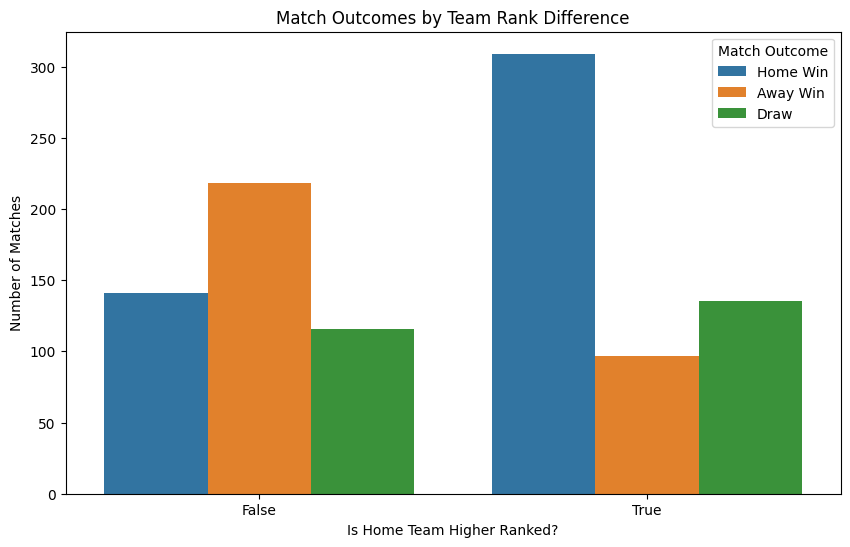

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adding a column to indicate if the home team is higher ranked than the away team
UEFA_df['home_rank_higher'] = UEFA_df['home_team_rank'] < UEFA_df['away_team_rank']

# Determining match outcome
def match_outcome(row):
    if row['home_score'] > row['away_score']:
        return 'Home Win'
    elif row['home_score'] < row['away_score']:
        return 'Away Win'
    else:
        return 'Draw'

UEFA_df['outcome'] = UEFA_df.apply(match_outcome, axis=1)

# Visualizing outcomes by team ranks
plt.figure(figsize=(10, 6))
sns.countplot(x='home_rank_higher', hue='outcome', data=UEFA_df)
plt.title('Match Outcomes by Team Rank Difference')
plt.xlabel('Is Home Team Higher Ranked?')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.show()


Explanation: This chart indicates that when the home team is higher-ranked, there are singificantly more home wins, and when the home team is not high-ranked, away wins are more frequent with a large number of draws as well

**Match Outcomes by Points Difference**

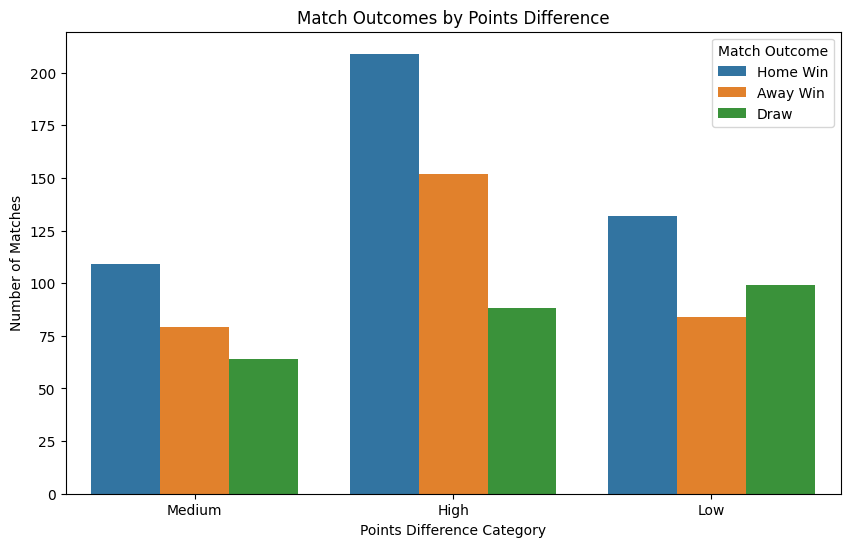

In [18]:
# Calculating points difference
UEFA_df['points_difference'] = abs(UEFA_df['total_points_home'] - UEFA_df['total_points_away'])

# Categorizing points difference
def categorize_points_difference(row):
    if row['points_difference'] <= 100:
        return 'Low'
    elif row['points_difference'] <= 200:
        return 'Medium'
    else:
        return 'High'

UEFA_df['points_diff_category'] = UEFA_df.apply(categorize_points_difference, axis=1)

# Visualizing outcomes by points difference
plt.figure(figsize=(10, 6))
sns.countplot(x='points_diff_category', hue='outcome', data=UEFA_df)
plt.title('Match Outcomes by Points Difference')
plt.xlabel('Points Difference Category')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.show()


Explanation: This chart shows that a high points difference corresponds to more home wins, while a low points difference leads to a more even distribution of match outcomes, including away wins and draws.

**Heatmape Visualizing the Performance of Teams Against Each Other**

/var/folders/dd/5hhztzc96t1717zrjlkk8nsh0000gn/T/ipykernel_90068/375149984.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  outcome_matrix = pd.pivot_table(UEFA_df, values='numeric_outcome',
/var/folders/dd/5hhztzc96t1717zrjlkk8nsh0000gn/T/ipykernel_90068/375149984.py:13: FutureWarning: The provided callable <function sum at 0x7f91f8197130> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  outcome_matrix = pd.pivot_table(UEFA_df, values='numeric_outcome',


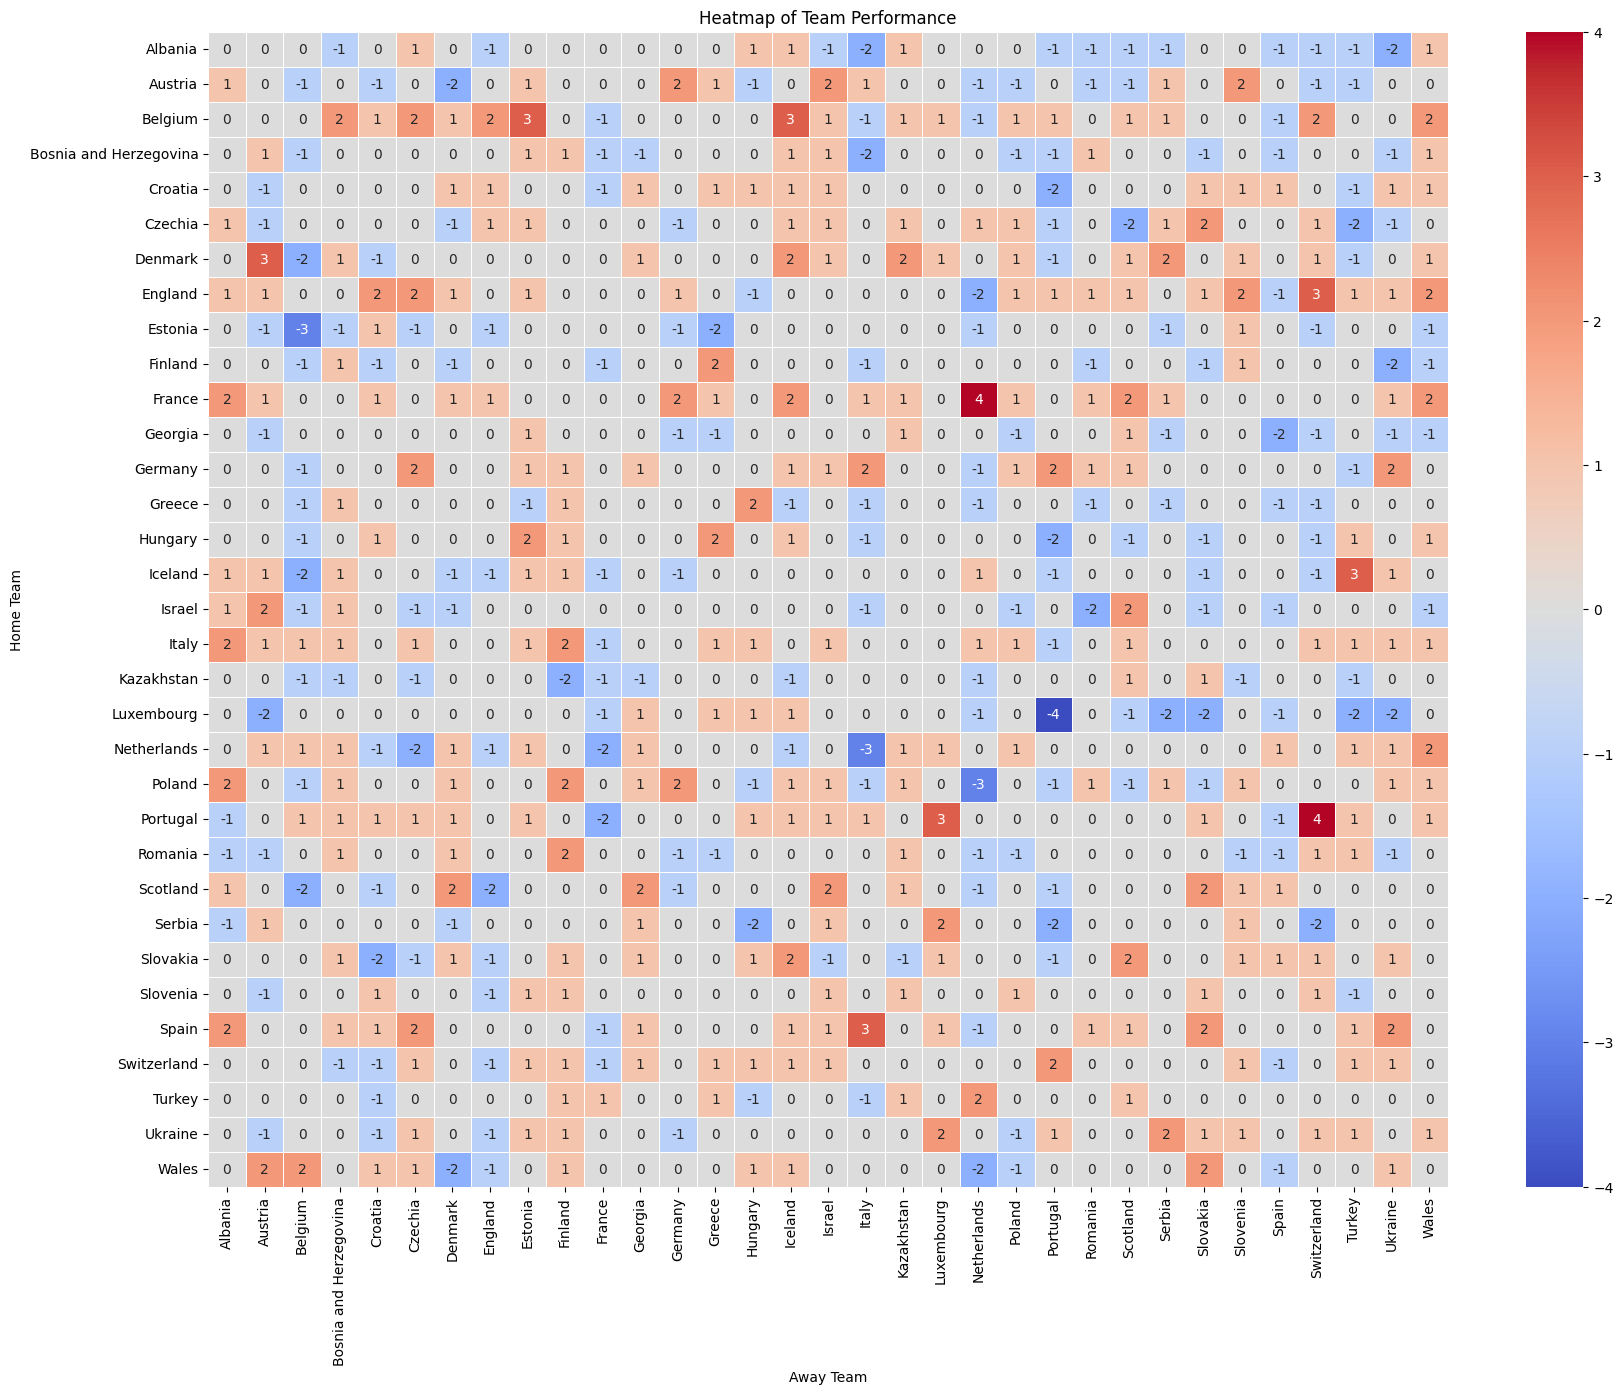

In [19]:

# Mapping match outcomes to numeric values
def get_numeric_outcome(row):
    if row['home_score'] > row['away_score']:
        return 1  # Home win
    elif row['home_score'] < row['away_score']:
        return -1  # Home loss
    else:
        return 0  # Draw

UEFA_df['numeric_outcome'] = UEFA_df.apply(get_numeric_outcome, axis=1)

# Creating a DataFrame to hold the outcomes of matches between teams
outcome_matrix = pd.pivot_table(UEFA_df, values='numeric_outcome',
                                 index='home_team', columns='away_team',
                                 aggfunc=np.sum, fill_value=0)


# Since we're aggregating outcomes, our matrix is already set with +1, 0, and -1 values representing win, draw, and loss.

# Step 3:  the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(outcome_matrix, annot=True, cmap='coolwarm', fmt="d", linewidths=.5)
plt.title('Heatmap of Team Performance')
plt.xlabel('Away Team')
plt.ylabel('Home Team')
plt.show()

Explanation: This heatmap shows the performance of various national teams against each other, with the home teams listed on the y axis and the away teams on the x axis. Red indicates a higher score (better performance) and blue indicates a lower score (worse performance) for the home team against specific away teams. The results from the heatmap vary a lot.

**Match Outcomes by Tournament Type**

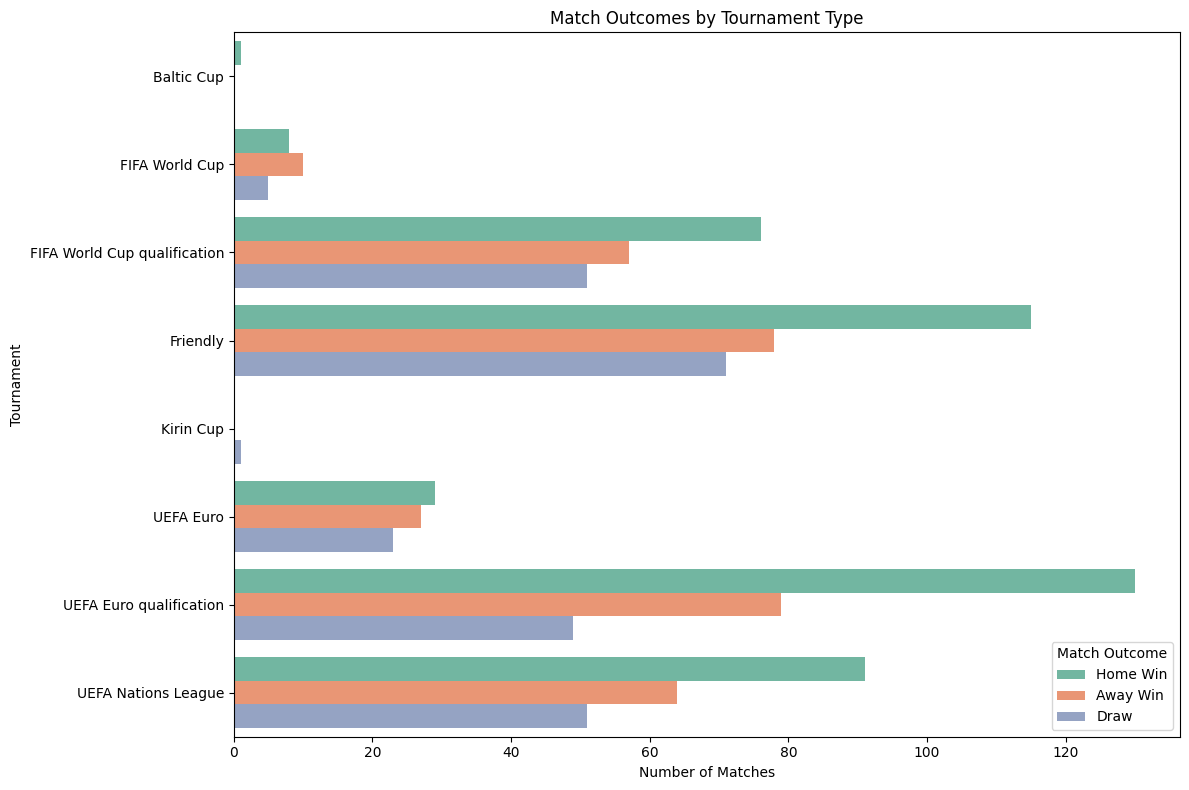

In [20]:

# Visualizing match outcomes by tournament type
plt.figure(figsize=(12, 8))
sns.countplot(y='tournament', hue='outcome', data=UEFA_df, palette='Set2')
plt.title('Match Outcomes by Tournament Type')
plt.xlabel('Number of Matches')
plt.ylabel('Tournament')
plt.legend(title='Match Outcome', loc='lower right')
plt.tight_layout()
plt.show()


Explanation: The bar chart compares the number of home wins, away wins, and draws across different types of football tournaments. It indicates that home wins are more common in friendly matches, whereas draws are relatively more frequent in UEFA Nations League games.








# **ML Tasks**

## Random Forest Classifier

Random Forest is an ensemble learning method that constructs a multitude of decision trees and outputs the mode of the classes (classification) of the individual trees.


In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


X = UEFA_df[['home_team_rank', 'away_team_rank', 'rank_change_home', 'rank_change_away']]
y = UEFA_df['outcome']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)



              precision    recall  f1-score   support

    Away Win       0.42      0.52      0.46        54
        Draw       0.27      0.19      0.22        52
    Home Win       0.55      0.56      0.56        98

    accuracy                           0.46       204
   macro avg       0.41      0.42      0.41       204
weighted avg       0.44      0.46      0.45       204

Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best score: 0.49753086419753084


### Feature Selection

In order to improve the model's performance, we will both select more features from the dataset and also engineer more features in an attempt to improve performance

In [22]:
# Creating new features to represent the total points scored by each team in their last five matches
# (3 points for a win, 1 for a draw, 0 for loss)

UEFA_df['home_recent_points'] = 0
UEFA_df['away_recent_points'] = 0

def calculate_recent_points(row, team_type='home'):

  '''Calculate the total performance score from the last 5 games for a specified team type'''

    # Check whether home or away team is being used for this row
  team = row['home_team'] if team_type == 'home' else row['away_team']

    # Filter the dataframe for the last 5 matches of specified team
  past_matches = UEFA_df[((UEFA_df['home_team'] == team) |
   (UEFA_df['away_team'] == team)) &
    (UEFA_df['date'] < row['date'])].tail(5)

    # Initialize variable to keep track of recent points
  recent_points = 0

    # Go through last 5 matches to calculate recent points
  for index, row in past_matches.iterrows():
      if row['home_team'] == team:
          if row['home_score'] > row['away_score']:
              recent_points += 3
          elif row['home_score'] == row['away_score']:
              recent_points += 1
      else:
          if row['away_score'] > row['home_score']:
              recent_points += 3
          elif row['away_score'] == row['home_score']:
              recent_points += 1
  return recent_points

# Apply the function to each row to calculate the score for home and away teams
UEFA_df['home_recent_points'] = UEFA_df.apply(lambda row:
                                            calculate_recent_points(row, 'home'),
                                            axis=1)
UEFA_df['away_recent_points'] = UEFA_df.apply(lambda row:
                                            calculate_recent_points(row, 'away'),
                                            axis=1)

In [23]:
# Add new features 'h2h_home_win', 'h2h_away_win', and 'h2h_draw' to store the number of
# wins, losses, and draws between two teams in previous matches

UEFA_df['h2h_home_win'] = 0
UEFA_df['h2h_away_win'] = 0
UEFA_df['h2h_draw'] = 0

def calculate_h2h_performance(row):
    """Calculate head-to-head performance between two teams before the current match."""

    home_team = row['home_team']
    away_team = row['away_team']

    # Filter past amtches btween the current teams
    past_matches = UEFA_df[((UEFA_df['home_team'] == home_team) & (UEFA_df['away_team'] == away_team)) |
                           ((UEFA_df['home_team'] == away_team) & (UEFA_df['away_team'] == home_team)) &
                           (UEFA_df['date'] < row['date'])]

    # Initialize counters for each match outcome
    home_win, away_win, draw = 0, 0, 0

    # Outcomes from past matches
    for index, row in past_matches.iterrows():
        if row['home_score'] > row['away_score']:
            if row['home_team'] == home_team:
                home_win += 1
            else:
                away_win += 1
        elif row['home_score'] < row['away_score']:
            if row['home_team'] == home_team:
                away_win += 1
            else:
                home_win += 1
        else:
            draw += 1

    return home_win, away_win, draw

# Calculate head-to-head metrics and store them in the dataframe to calculate the head-to-head performance metrics
h2h_results = UEFA_df.apply(calculate_h2h_performance, axis=1)
UEFA_df['h2h_home_win'], UEFA_df['h2h_away_win'], UEFA_df['h2h_draw'] = zip(*h2h_results)

In [24]:
# Create new feature 'points_change' to find the change in FIFA rankings points for both home and away teams
# They will be used as an indicator of the overall recent performance of the team
UEFA_df['home_points_change'] = UEFA_df['total_points_home'] - UEFA_df['previous_points_home']
UEFA_df['away_points_change'] = UEFA_df['total_points_away'] - UEFA_df['previous_points_away']

# Calculate the difference in points change between home and away teams
UEFA_df['points_change_difference'] = UEFA_df['home_points_change'] - UEFA_df['away_points_change']

In [25]:
# Reimplementing the Random Forest model using new features
X = UEFA_df[['home_team_rank', 'away_team_rank', 'home_recent_points',
             'away_recent_points', 'points_difference', 'h2h_home_win',
             'h2h_away_win', 'h2h_draw', 'points_change_difference']]
y = UEFA_df['outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest.
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree.
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Random Forest:", grid_search.best_params_)
print("Best score Random Forest:", grid_search.best_score_)

              precision    recall  f1-score   support

    Away Win       0.74      0.63      0.68        54
        Draw       0.65      0.60      0.62        52
    Home Win       0.79      0.89      0.84        98

    accuracy                           0.75       204
   macro avg       0.73      0.70      0.71       204
weighted avg       0.74      0.75      0.74       204

Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 200}
Best score Random Forest: 0.7475497992880406


Precision (How often the model is correct when it predicts a positive outcome):

- Away Win: With a precision of 0.74, the model is quite accurate when predicting away wins, meaning it has a lower rate of false positives for this class.
- Draw: A precision of 0.65 indicates that the model has moderate accuracy when it predicts draws, though there's still a significant proportion of false positives.
- Home Win: The model is most precise with home win predictions, showing a precision of 0.79.

Recall (How well the model is able to identify actual positive outcomes):

- Away Win: A recall of 0.63 suggests that the model correctly identifies the majority of away wins but misses some.
- Draw: The recall for draws is 0.60, which means the model is fairly good at detecting draws, but it does miss a considerable number of actual draw instances.
- Home Win: The model exhibits a high recall of 0.89 for home wins, indicating it can identify most of the actual home wins.

F1-Score (The harmonic mean of precision and recall, a balance between the two):

- Away Win: An F1-score of 0.68 is fairly balanced, showing good overall performance for this class.
- Draw: The F1-score of 0.62 for draws is lower, reflecting challenges in accurately predicting draws.
- Home Win: The highest F1-score of 0.84 for home wins indicates that the model's predictions for home wins are both precise and robust.

Support (The number of true instances for each label):

The model was tested on 54 away wins, 52 draws, and 98 home wins.

Aggregate Metrics:

Accuracy: The model has an accuracy of 0.75, meaning it correctly predicts the match outcome 75% of the time.

Macro Average: The macro average for precision, recall, and F1-score is around 0.73, indicating that the model has a balanced performance across all classes when each class is equally weighted.


Weighted Average: The weighted averages take into account the support for each class, resulting in similar precision, recall, and F1-score as the macro average, which demonstrates that the model is reasonably balanced even when considering class imbalance.

Best Parameters and Score from GridSearchCV:

The optimal parameters for the Random Forest are {'max_depth': None, 'n_estimators': 200}, which suggests the best performance comes from a model with no maximum depth (allowing trees to grow until all leaves are pure or until all leaves contain less than min_samples_split samples) and using 200 trees in the forest.The best cross-validated accuracy score obtained from GridSearchCV is approximately 0.75, showing consistent performance with the accuracy observed on the test set.


Evaluation:
The Random Forest model demonstrates a strong ability to predict home wins, which is beneficial since this is often the most common outcome in football matches. It shows reasonably good performance for away wins and has more difficulty with draws, which are inherently challenging to predict due to their less frequent occurrence and the nature of the game. The model benefits from the ensemble approach of Random Forest, which aggregates the predictions of many decision trees to reduce overfitting and improve generalization. The lack of a max_depth limit allows the trees to fully grow to best capture the complexities in the data, which seems to be effective given the dataset and task. The use of 200 trees contributes to the robustness of the model, balancing variance and bias effectively. Overall, the Random Forest model appears to be well-tuned and performs competently in predicting football match outcomes.


## K-Nearest Neighbors Classifier (KNN Classifier)
KNN Classifier predicts the label of a data point by looking at the 'k' closest labeled data points and taking a majority vote or weighted decision based on their distances.

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_scaled = scaler.fit_transform(X)

# Split the scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Initialize the KNN classifier with default parameters
knn = KNeighborsClassifier()

# Fit the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
#the parameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

#GridSearchCV
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search_knn.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for KNN:", grid_search_knn.best_params_)
print("Best score for KNN:", grid_search_knn.best_score_)


              precision    recall  f1-score   support

    Away Win       0.62      0.72      0.67        54
        Draw       0.62      0.50      0.55        52
    Home Win       0.78      0.79      0.78        98

    accuracy                           0.70       204
   macro avg       0.67      0.67      0.67       204
weighted avg       0.70      0.70      0.69       204

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best score for KNN: 0.7401499659168371


Precision (Ability of the classifier not to label a sample as positive that is negative):

- Away Win: Precision is 0.62, which suggests that the model has a reasonable rate of correct predictions for away wins, but there is room for improvement since around 38% of the predictions for away wins are incorrect.
- Draw: Precision is also 0.62, indicating that when the model predicts a draw, it's correct about 62% of the time. However, there is a significant number of false positives for draws.
- Home Win: The model has the highest precision for home wins at 0.78, meaning it's more reliable when predicting home victories.

Recall (Ability of the classifier to find all the positive samples):

- Away Win: The recall is higher for away wins at 0.72, indicating that the model is relatively good at identifying most of the actual away wins, but still misses about 28% of them.
- Draw: The model's recall for draws is 0.50, meaning it correctly identifies half of the actual draws.
- Home Win: The highest recall is for home wins at 0.79, suggesting the model is able to identify most of the actual home wins.

F1-Score (Weighted harmonic mean of precision and recall):

- Away Win: The F1-score is 0.67, which is balanced between precision and recall, reflecting moderate accuracy for away win predictions.
- Draw: The F1-score for draws is the lowest at 0.55, indicating challenges in accurately predicting draws.
- Home Win: The F1-score for home wins is the highest at 0.78, suggesting the model's predictions for home wins are both precise and robust.

Support (Number of true instances for each label):

The model was tested on 54 away wins, 52 draws, and 98 home wins.

Aggregate Metrics:

Accuracy: With an overall accuracy of 0.70, the model correctly predicts the match outcome 70% of the time across all classes.

Macro Average Precision/Recall/F1-Score: All macro averages are at 0.67, indicating a balanced performance across different classes without giving additional weight to the majority class.

Weighted Average Precision/Recall/F1-Score: The weighted averages are similar to the macro averages but slightly higher, reflecting the influence of class imbalance due to the different support values.

Evaluation:
The KNN model shows a good balance between precision and recall for home wins, which is the most frequent outcome in the dataset, and it performs reasonably well for away wins. The model struggles with predicting draws, which is often the case in football match predictions due to the inherent challenge of accurately forecasting a draw. The choice of the Manhattan distance and the weighting by distance likely contribute positively to the model's ability to differentiate between the classes. The model does not appear to be overfitting, as the performance on the test set is aligned with the cross-validation results, indicating that the model generalizes well. There is no strong indication of underfitting, as the model is performing with reasonable accuracy, although there is room for improvement, particularly in predicting draws. The model's overall performance suggests it can predict the correct match outcome about 70% to 74% of the time, depending on whether we consider the test set or cross-validation results.

## Support Vector Machine

SVM is a robust classification technique that seeks to find a hyperplane in an N-dimensional space (N being the number of features) that distinctly classifies the data points. It aims to maximize the margin between the data points of different classes. The margin is defined as the distance between the hyperplane (decision boundary) and the nearest data points from each class, which are known as support vectors. This makes the model robust to noise and outliers.


In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# selecting features and target variable
X = UEFA_df[['home_team_rank', 'away_team_rank', 'total_points_home', 'total_points_away',
             'home_recent_points', 'away_recent_points', 'h2h_home_win', 'h2h_away_win',
             'h2h_draw', 'points_change_difference']]
y = UEFA_df['outcome']

# Scaling features and encoding target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Define parameter grid for GridSearchCV
param_grid_svm = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

svm = SVC(probability=True)

# Initialize Grid Search with Cross Validation and return the training score
svm_grid = GridSearchCV(svm, param_grid=param_grid_svm, cv=5, return_train_score=True)
svm_grid.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for SVM:", svm_grid.best_params_)
print("Best score for SVM:", svm_grid.best_score_)

# Use the best estimator to make predictions
y_pred = svm_grid.predict(X_test)

# Evaluate the model
target_names = ['Away Win', 'Draw', 'Home Win']
print(classification_report(y_test, y_pred, target_names=target_names))




Best parameters for SVM: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best score for SVM: 0.7672725895629781
              precision    recall  f1-score   support

    Away Win       0.84      0.70      0.77        54
        Draw       0.61      0.73      0.67        52
    Home Win       0.84      0.83      0.83        98

    accuracy                           0.77       204
   macro avg       0.76      0.75      0.76       204
weighted avg       0.78      0.77      0.77       204



Support (Number of true instances for each label):
- Indicates that the model was tested on 54 away wins, 52 draws, and 98 home wins.

Precision (Ability of the classifier not to label as positive a sample that is negative):
- Away Win: High precision suggests the model is good at predicting away wins without many false positives.
- Draw: Lower precision indicates more false positives when predicting draws.
- Home Win: High precision indicates reliable predictions for home wins.

Recall (Ability of the classifier to find all the positive samples):

- Away Win: Moderate recall implies some away wins are being missed.
- Draw: Recall is better than precision for draws, indicating the model is better at detecting draws but may still miss some.
- Home Win: High recall, meaning the model is good at identifying most of the home wins.

F1-Score (A weighted harmonic mean of precision and recall):
- Away Win: Good F1-score indicates a balance between precision and recall for away wins.
- Draw: Lower F1-score reflects challenges in accurately predicting draws.
- Home Win: High F1-score suggests that the model's predictions for home wins are both precise and robust.


Aggregate Metrics:
- Accuracy: 0.77 - This metric indicates that the model predicts the correct outcome 77% of the time across all classes. While this is a solid performance, accuracy alone can be misleading in the presence of class imbalance, as the model could be performing well on the majority class and poorly on the minority class
- Macro Average Precision/Recall/F1-Score: Around 0.76 - The macro average treats all classes equally, giving the same weight to each class regardless of how many instances it has. Macro average precision, recall, and F1-score all being around 76% suggests the model has a fairly balanced performance across different classes. This is a particularly useful metric to ensure that the model treats each class with equal importance, regardless of their frequency.
- Weighted Average Precision/Recall/F1-Score: Around 0.77 - The weighted average takes label imbalance into account by weighting the metrics by the number of true instances for each class. This gives a higher weight to the majority class and less to the minority classes. The fact that the weighted average precision, recall, and F1-score are also around 0.77 indicates that the model's good performance is not solely on the majority class. It shows a somewhat balanced ability of the model to handle both majority and minority classes according to their presence in the dataset.

Evaluation:
The model performs best in predicting home wins, likely due to the larger number of instances available for that class (support = 98). It struggles more with predicting draws, which could be due to the complex nature of accurately predicting a draw or fewer instances to learn from. Given the class imbalance, the weighted averages are better indicators of overall model performance. Overall the performance of the model indicates that the model can predict the correct outcome around 77% of the time.

In [28]:
# Display the CV results for the train and test set
cv_results = pd.DataFrame(svm_grid.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']].head()

,mean_train_score,std_train_score,mean_test_score,std_test_score
13,0.776787,0.002641,0.767273,0.019262
7,0.780174,0.001646,0.761100,0.016943
19,0.775863,0.003133,0.761092,0.009637
18,0.780481,0.003425,0.758615,0.017689
17,0.823584,0.002500,0.757404,0.014084


Given that for the best parameters the mean_train_score is 77.68% which is only a 0.96% difference with the mean_test_score (76.73%), the SVM does not overfit or underfit the data which demonstrates low bias and variance

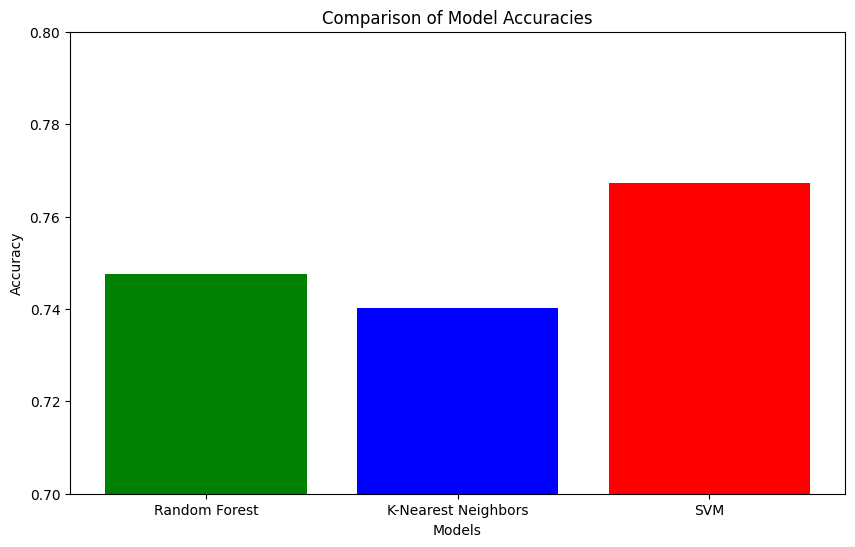

In [29]:
# Best accuracy scores for each of the models
best_score_rf = 0.7475
best_score_knn = 0.7401
best_score_svm = 0.7672


models = ['Random Forest', 'K-Nearest Neighbors', 'SVM']

# Accuracy Scores
scores = [best_score_rf, best_score_knn, best_score_svm]

# bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, scores, color=['green', 'blue', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0.7, 0.8])  # limits for better visualization
plt.show()


SVM shows the highest accuracy among the three models, which suggests it might be the best at handling the complexity of the dataset with its ability to model non-linear decision boundaries effectively. Random Forest also performs well. This model benefits from its ability to handle high-dimensional data and model non-linear relationships. K-Nearest Neighbors has a slightly lower accuracy compared to the other two.

The SVM model shows the highest overall accuracy among the three models. An accuracy of 0.77 is indicative of a model that performs well across all outcome classes. The macro and weighted averages indicate that the SVM model treats all classes fairly and performs well even when class imbalance is accounted for. This suggests that the model is not only performing well on the majority class but also handling minority classes effectively. The SVM's ability to provide high precision and recall, particularly for home wins, which are more frequent in football, demonstrates its robustness as a model. The consistent performance across different classes suggests that the SVM model has a good generalization capability, which is crucial for the unpredictable nature of football matches.

These factors combined with the make the SVM an appropriate choice for predicting UEFA Euro 2024 match outcomes.



# **Creating the Bracket**

In [30]:
# Extract head-to-head match statistics between two specified teams to predict a match outcome

def extract_h2h_statistics(home_team, away_team):

    # Select matches where the two teams have faced each other
    h2h_matches = UEFA_df[((UEFA_df['home_team'] == home_team) & (UEFA_df['away_team'] == away_team)) |
                          ((UEFA_df['home_team'] == away_team) & (UEFA_df['away_team'] == home_team))]

    # Initialize counters
    h2h_home_win = 0
    h2h_away_win = 0
    h2h_draw = 0

    # Count the outcomes
    for _, row in h2h_matches.iterrows():
        if row['home_team'] == home_team:
            if row['home_score'] > row['away_score']:
                h2h_home_win += 1
            elif row['home_score'] < row['away_score']:
                h2h_away_win += 1
            else:
                h2h_draw += 1
        else:
            if row['home_score'] > row['away_score']:
                h2h_away_win += 1
            elif row['home_score'] < row['away_score']:
                h2h_home_win += 1
            else:
                h2h_draw += 1

    return h2h_home_win, h2h_away_win, h2h_draw

In [31]:
# Extract relevant features for a match between a home team and an away team to predict the outcome
def extract_match_features(home_team, away_team):
    # Assuming 'date' column is sorted or using sort_values to ensure the latest match is selected accurately

    # Find the most recent match where each team played, regardless of being home or away
    latest_home_team_match = UEFA_df[(UEFA_df['home_team'] == home_team) | (UEFA_df['away_team'] == home_team)].iloc[-1]
    latest_away_team_match = UEFA_df[(UEFA_df['home_team'] == away_team) | (UEFA_df['away_team'] == away_team)].iloc[-1]

    # Extracting rank and total points directly
    if latest_home_team_match['home_team'] == home_team:
        home_team_rank = latest_home_team_match['home_team_rank']
        total_points_home = latest_home_team_match['total_points_home']
        home_recent_points = latest_home_team_match['home_recent_points']
    else:
        home_team_rank = latest_home_team_match['away_team_rank']
        total_points_home = latest_home_team_match['total_points_away']
        home_recent_points = latest_home_team_match['away_recent_points']

    if latest_away_team_match['away_team'] == away_team:
        away_team_rank = latest_away_team_match['away_team_rank']
        total_points_away = latest_away_team_match['total_points_away']
        away_recent_points = latest_away_team_match['away_recent_points']
    else:
        away_team_rank = latest_away_team_match['home_team_rank']
        total_points_away = latest_away_team_match['total_points_home']
        away_recent_points = latest_away_team_match['home_recent_points']

    # Extract head-to-head statistics using the previously defined approach
    h2h_home_win, h2h_away_win, h2h_draw = extract_h2h_statistics(home_team, away_team)

    # Compute points change difference
    # This assumes the dataset contains 'previous_points_home' and 'previous_points_away' for such calculations
    points_change_difference = (total_points_home - latest_home_team_match['previous_points_home']) - (total_points_away - latest_away_team_match['previous_points_away'])

    # Combine all features into a single vector
    features = [home_team_rank, away_team_rank, total_points_home, total_points_away,
                home_recent_points, away_recent_points, h2h_home_win, h2h_away_win,
                h2h_draw, points_change_difference]

    return features

In [32]:
# Predicts the match outcome (Home Win, Away Win, Draw) along with the probabilities for each outcome
def predict_outcome_with_probability(home_team, away_team, model):
    # Extract match feature
    features = extract_match_features(home_team, away_team)

    # Create a DataFrame from the features with the appropriate column names
    features_df = pd.DataFrame([features], columns=X.columns)

    # Scale the features using the same scaler as during model training
    scaled_features = scaler.transform(features_df)

    # Predict the outcome
    prediction_encoded = model.predict(scaled_features)
    prediction = label_encoder.inverse_transform(prediction_encoded)[0]

    # Predict the probabilities
    probabilities = model.predict_proba(scaled_features)[0]

    # Map probabilities to their respective labels
    probability_per_class = dict(zip(label_encoder.inverse_transform(range(len(probabilities))), probabilities))

    return prediction, probability_per_class

In [33]:
# In the case of a draw, the team with the higher probability of winning wins
# this is to account for the fact that our model does not have Extra time, penalty and other
# resolutions that take place in the case of draws in the round of 16, quarter finals, semi finals
# and finals
def resolve_draw(home_team, away_team, model):
    # Predict outcome and probabilities
    prediction, probabilities = predict_outcome_with_probability(home_team, away_team, model)

    # If the prediction is a draw, resolve using probabilities
    if prediction == 'Draw':
        # Compare win probabilities
        if probabilities['Home Win'] > probabilities['Away Win']:
            resolved_outcome = 'Home Win'
        else:
            resolved_outcome = 'Away Win'
    else:
        # No resolution needed, use the original prediction
        resolved_outcome = prediction

    return resolved_outcome, probabilities

Group A :
Germany
Scotland
Hungary
Switzerland

Group B:
Spain
Croatia
Italy
Albania

Group C:
Slovenia
Denmark
Serbia
England

Group D:
Netherlands
France
Poland
Austria

Group E:
Ukraine
Slovakia
Belgium
Romania

Group F:
Portugal
Czechia
Georgia
Turkey


In [34]:
# Assuming 'model', 'scaler', and 'label_encoder' are already initialized and fitted
def predict_match_winner(home_team, away_team, model):
    resolved_outcome, _ = resolve_draw(home_team, away_team, model)
    if resolved_outcome == 'Home Win':
        return home_team
    elif resolved_outcome == 'Away Win':
        return away_team
    else:
        return "Draw"

def predict_multiple_matches(matches, model):
    winners = []
    for home_team, away_team in matches:
        winner = predict_match_winner(home_team, away_team, model)
        winners.append(winner)
    return winners

# List of games
matches = [
    ("Germany", "Scotland"), ("Hungary", "Switzerland"), ("Spain", "Croatia"), ("Italy", "Albania"), ("Poland", "Netherlands"),
    ("Slovenia", "Denmark"), ("Serbia", "England"), ("Romania", "Ukraine"), ("Belgium", "Slovakia"), ("Austria", "France"),
    ("Turkey", "Georgia"), ("Portugal", "Czechia"), ("Germany", "Hungary"), ("Scotland", "Switzerland"), ("Slovenia", "Serbia"),
    ("Denmark", "England"), ("Spain", "Italy"), ("Slovakia", "Ukraine"), ("Poland", "Austria"), ("Netherlands", "France"),
    ("Georgia", "Czechia"), ("Turkey", "Portugal"), ("Belgium", "Romania"), ("Switzerland", "Germany"), ("Scotland", "Hungary"),
    ("Albania", "Spain"), ("Croatia", "Italy"), ("Netherlands", "Austria"), ("France", "Poland"), ("England", "Slovenia"),
    ("Denmark", "Serbia"),
    ("Slovakia", "Romania"),
    ("Ukraine", "Belgium"),
    ("Georgia", "Portugal"),
    ("Czechia", "Turkey"),
    ("Croatia", "Albania"),
    ("Scotland", "Germany"),
]

# Predict the winners of multiple matches
predicted_winners = predict_multiple_matches(matches, svm_grid.best_estimator_)

# Display the predicted winners
for match, winner in zip(matches, predicted_winners):
    print(f"Winner of {match[0]} vs {match[1]}: {winner}")

Winner of Germany vs Scotland: Germany
Winner of Hungary vs Switzerland: Switzerland
Winner of Spain vs Croatia: Spain
Winner of Italy vs Albania: Italy
Winner of Poland vs Netherlands: Netherlands
Winner of Slovenia vs Denmark: Denmark
Winner of Serbia vs England: England
Winner of Romania vs Ukraine: Ukraine
Winner of Belgium vs Slovakia: Belgium
Winner of Austria vs France: France
Winner of Turkey vs Georgia: Turkey
Winner of Portugal vs Czechia: Portugal
Winner of Germany vs Hungary: Germany
Winner of Scotland vs Switzerland: Switzerland
Winner of Slovenia vs Serbia: Serbia
Winner of Denmark vs England: England
Winner of Spain vs Italy: Spain
Winner of Slovakia vs Ukraine: Slovakia
Winner of Poland vs Austria: Poland
Winner of Netherlands vs France: France
Winner of Georgia vs Czechia: Czechia
Winner of Turkey vs Portugal: Portugal
Winner of Belgium vs Romania: Romania
Winner of Switzerland vs Germany: Switzerland
Winner of Scotland vs Hungary: Scotland
Winner of Albania vs Spain: 

In [35]:
# Initialize a dictionary to keep track of points for each team
team_points = {team: 0 for match in matches for team in match}

# Function to update points based on match outcome
def update_points(home_team, away_team, winner, points):
    if winner == "Draw":
        return points
    elif winner == home_team:
        points[home_team] += 3
    else:
        points[away_team] += 3
    return points

# Predict the winners of all matches and update points accordingly
for home_team, away_team in matches:
    winner = predict_match_winner(home_team, away_team, svm_grid.best_estimator_)
    team_points = update_points(home_team, away_team, winner, team_points)

# Display the points for each team
for team, points in team_points.items():
    print(f"{team}: {points} points")

Germany: 9 points
Scotland: 3 points
Hungary: 0 points
Switzerland: 9 points
Spain: 9 points
Croatia: 3 points
Italy: 3 points
Albania: 3 points
Poland: 3 points
Netherlands: 6 points
Slovenia: 0 points
Denmark: 6 points
Serbia: 3 points
England: 9 points
Romania: 6 points
Ukraine: 3 points
Belgium: 6 points
Slovakia: 3 points
Austria: 0 points
France: 9 points
Turkey: 6 points
Georgia: 0 points
Portugal: 9 points
Czechia: 3 points


In [36]:
# Define function to find the ranking for each group
def calculate_group_rankings(group_teams, team_points):
    sorted_teams = sorted(group_teams, key=lambda x: team_points[x], reverse=True)
    return sorted_teams

# Define groups
groups = {
    "Group A": ["Germany", "Hungary", "Scotland", "Switzerland"],
    "Group B": ["Spain", "Italy", "Albania", "Croatia"],
    "Group C": ["Slovenia", "Serbia", "Denmark", "England"],
    "Group D": ["Poland", "Austria", "Netherlands", "France"],
    "Group E": ["Romania", "Belgium", "Slovakia", "Ukraine"],
    "Group F": ["Turkey", "Portugal", "Georgia", "Czechia"]
}

# Calculate rankings for each group based on points
group_rankings = {group: calculate_group_rankings(teams, team_points) for group, teams in groups.items()}

# Display the rankings for each group
for group, ranking in group_rankings.items():
    print(f"Rankings for {group}: {ranking}")

Rankings for Group A: ['Germany', 'Switzerland', 'Scotland', 'Hungary']
Rankings for Group B: ['Spain', 'Italy', 'Albania', 'Croatia']
Rankings for Group C: ['England', 'Denmark', 'Serbia', 'Slovenia']
Rankings for Group D: ['France', 'Netherlands', 'Poland', 'Austria']
Rankings for Group E: ['Romania', 'Belgium', 'Slovakia', 'Ukraine']
Rankings for Group F: ['Portugal', 'Turkey', 'Czechia', 'Georgia']


In [37]:
# Calculate rankings for all teams
all_teams_ranking = sorted(team_points.keys(), key=lambda x: team_points[x], reverse=True)

# Initialize a dictionary to store the best two teams from each group
best_two_teams = {group: group_rankings[group][:2] for group in group_rankings}

print("Best Two Teams from Each Group:")
for group, teams in best_two_teams.items():
    print(f"{group}: {teams}")

# Calculate the third teams from each group
third_teams = {group: group_rankings[group][2] for group in group_rankings}

# Sort the third teams based on points
third_place_ranking = sorted(third_teams.values(), key=lambda x: team_points[x], reverse=True)[:4]

print("\nThird Place Ranking:")
for team in third_place_ranking:
    print(team)

Best Two Teams from Each Group:
Group A: ['Germany', 'Switzerland']
Group B: ['Spain', 'Italy']
Group C: ['England', 'Denmark']
Group D: ['France', 'Netherlands']
Group E: ['Romania', 'Belgium']
Group F: ['Portugal', 'Turkey']

Third Place Ranking:
Scotland
Albania
Serbia
Poland


In [38]:
runner_ups = {group: group_rankings[group][1] for group in group_rankings}

# Define the Round of 16 matchups
round_of_16_matchups = [
    (group_rankings["Group B"][2], best_two_teams["Group A"][0]),  # Winner Group A vs. 3rd Group B
    (best_two_teams["Group B"][0], group_rankings["Group A"][2]),  # Winner Group B vs. 3rd Group A
    (best_two_teams["Group C"][0], group_rankings["Group D"][2]),  # Winner Group C vs. 3rd Group D
    (best_two_teams["Group D"][0], runner_ups["Group F"]),         # Winner Group D vs. Runner-up Group F
    (best_two_teams["Group E"][0], group_rankings["Group C"][2]),         # Winner Group E vs. Runner-up Group C
    (best_two_teams["Group F"][0], runner_ups["Group E"]),         # Winner Group F vs. Runner-up Group E
    (runner_ups["Group A"], runner_ups["Group D"]),                # Runner-up Group A vs. Runner-up Group D
    (runner_ups["Group B"], runner_ups["Group C"])                 # Runner-up Group B vs. Runner-up Group C
]

# Predict the winners of the Round of 16 matches
round_of_16_winners = predict_multiple_matches(round_of_16_matchups, svm_grid.best_estimator_)

# Display the winners of the Round of 16 matches
for matchup, winner in zip(round_of_16_matchups, round_of_16_winners):
    print(f"Winner of {matchup[0]} vs. {matchup[1]}: {winner}")

Winner of Albania vs. Germany: Germany
Winner of Spain vs. Scotland: Spain
Winner of England vs. Poland: England
Winner of France vs. Turkey: Turkey
Winner of Romania vs. Serbia: Romania
Winner of Portugal vs. Belgium: Belgium
Winner of Switzerland vs. Netherlands: Netherlands
Winner of Italy vs. Denmark: Italy


In [39]:
# Define the quarter-final matchups using the winners from the round of 16
quarter_final_matchups = [
    (round_of_16_winners[0], round_of_16_winners[1]),   # Winner R16 Match 1 vs. Winner R16 Match 2
    (round_of_16_winners[2], round_of_16_winners[3]),   # Winner R16 Match 3 vs. Winner R16 Match 4
    (round_of_16_winners[4], round_of_16_winners[5]),   # Winner R16 Match 5 vs. Winner R16 Match 6
    (round_of_16_winners[6], round_of_16_winners[7])    # Winner R16 Match 7 vs. Winner R16 Match 8
]

# Predict the winners of the quarter-final matches
quarter_final_winners = predict_multiple_matches(quarter_final_matchups, svm_grid.best_estimator_)

# Display the winners of the quarter-final matches
for matchup, winner in zip(quarter_final_matchups, quarter_final_winners):
    print(f"Winner of {matchup[0]} vs. {matchup[1]}: {winner}")

Winner of Germany vs. Spain: Germany
Winner of England vs. Turkey: England
Winner of Romania vs. Belgium: Belgium
Winner of Netherlands vs. Italy: Italy


In [40]:
# Define the semi-final matchups using the winners from the quarter-finals
semi_final_matchups = [
    (quarter_final_winners[0], quarter_final_winners[1]),   # Winner QF Match 1 vs. Winner QF Match 2
    (quarter_final_winners[2], quarter_final_winners[3])    # Winner QF Match 3 vs. Winner QF Match 4
]

# Predict the winners of the semi-final matches
semi_final_winners = predict_multiple_matches(semi_final_matchups, svm_grid.best_estimator_)

# Display the winners of the semi-final matches
for matchup, winner in zip(semi_final_matchups, semi_final_winners):
    print(f"Winner of {matchup[0]} vs. {matchup[1]}: {winner}")

Winner of Germany vs. England: England
Winner of Belgium vs. Italy: Italy


In [41]:
# Define the final matchup using the winners from the semi-finals
final_matchup = (semi_final_winners[0], semi_final_winners[1])

# Predict the winner of the final match
final_winner = predict_match_winner(final_matchup[0], final_matchup[1], svm_grid.best_estimator_)

# Display the winner of the final match
print(f"\nWinner of the Final: {final_winner}")


Winner of the Final: England


Using the same bracket as the official UEFA Euro 2024, our model predicts that England will win the EURO 2024. This result is coherent with England's performance in the last couple years as they where runner ups in the last EURO.